In [232]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.dates as mdates

In [233]:
%%javascript
IPython.OutputArea.auto_scroll_threshold=9999;

<IPython.core.display.Javascript object>

In [6]:
#Taking only data with spei not null and year >=2000
df = pandas.read_csv('spei.csv')
df = df[df['spei'].notnull()]
df.to_csv('modified_spei.csv')

In [51]:
#Taking just the features time and spei
df = pandas.read_csv('modified_spei.csv')

In [54]:
#Getting Spei for Boulder
df_lat=df.loc[df['lat']==40.25]
df_lat
df_lon = df_lat.loc[df_lat['lon']==105.25]
df_lon

,Unnamed: 0,time,lat,lon,spei
33279,187770,1901-01-16,40.25,105.25,0.607831
99604,446970,1901-02-15,40.25,105.25,0.328387
165896,706170,1901-03-16,40.25,105.25,0.220995
232247,965370,1901-04-16,40.25,105.25,0.311126
298676,1224570,1901-05-16,40.25,105.25,0.139550
...,...,...,...,...,...
91288186,356587770,2015-08-16,40.25,105.25,-2.071283
91354613,356846970,2015-09-16,40.25,105.25,1.760069
91421015,357106170,2015-10-16,40.25,105.25,-0.439770
91487439,357365370,2015-11-16,40.25,105.25,1.914245


In [60]:
df_Boulder=df_lon[['time','spei']]
df_Boulder=df_Boulder.set_index('time')
df_Boulder

,spei
time,
1901-01-16,0.607831
1901-02-15,0.328387
1901-03-16,0.220995
1901-04-16,0.311126
1901-05-16,0.139550
...,...
2015-08-16,-2.071283
2015-09-16,1.760069
2015-10-16,-0.439770


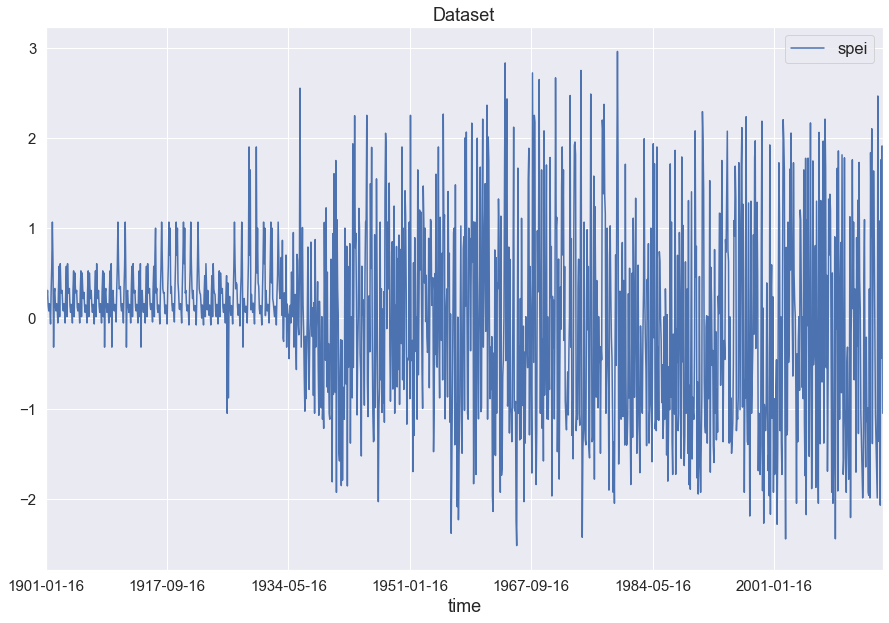

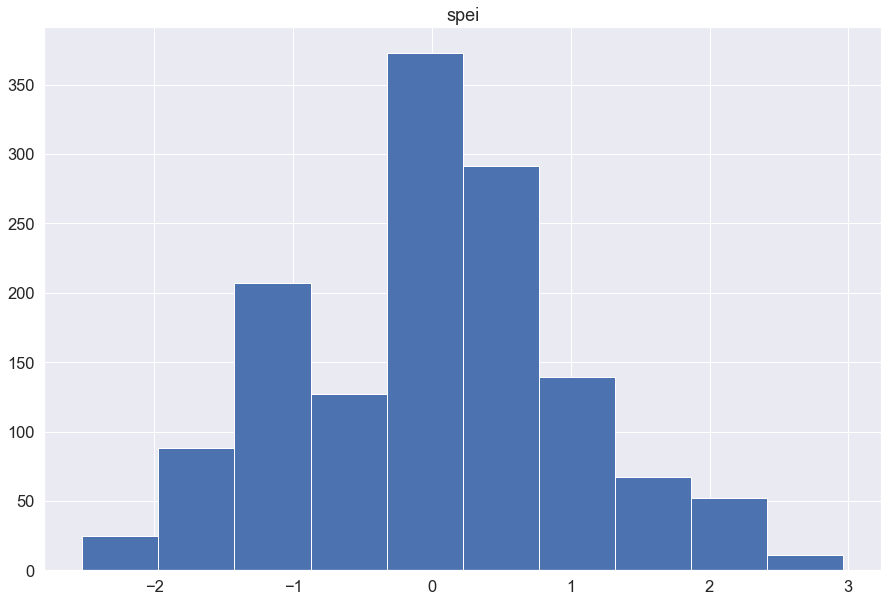

In [148]:
#Exploratory Data Analysis
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
df_Boulder.plot(figsize=(15, 10),fontsize=15,label="Spei",title="Dataset")
df_Boulder.hist(figsize=(15, 10))
pyplot.show()

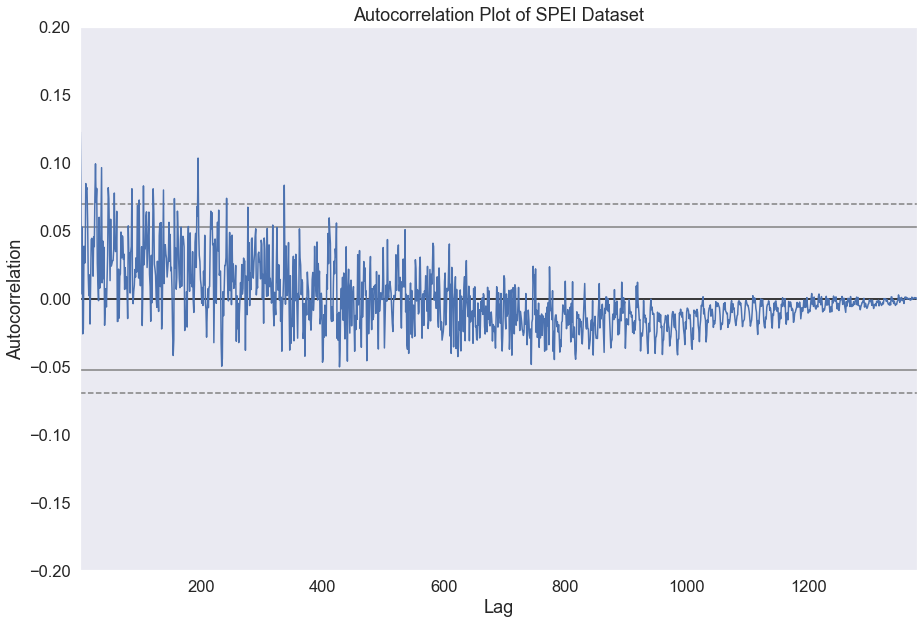

In [170]:
from pandas.plotting import autocorrelation_plot
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
plt.figure(num=1, figsize=(15, 10))
ax=autocorrelation_plot(df_Boulder)
ax.set_ylim([-0.2, 0.2])
ax.set_title("Autocorrelation Plot of SPEI Dataset")
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.spei   No. Observations:                 1379
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2053.663
Method:                       css-mle   S.D. of innovations              1.073
Date:                Thu, 12 Dec 2019   AIC                           4121.326
Time:                        17:35:24   BIC                           4157.929
Sample:                             1   HQIC                          4135.019
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.010     -0.016      0.987      -0.019       0.018
ar.L1.D.spei    -0.7257      0.027    -27.184      0.000      -0.778      -0.673
ar.L2.D.spei    -0.5321      0.032    -16.37

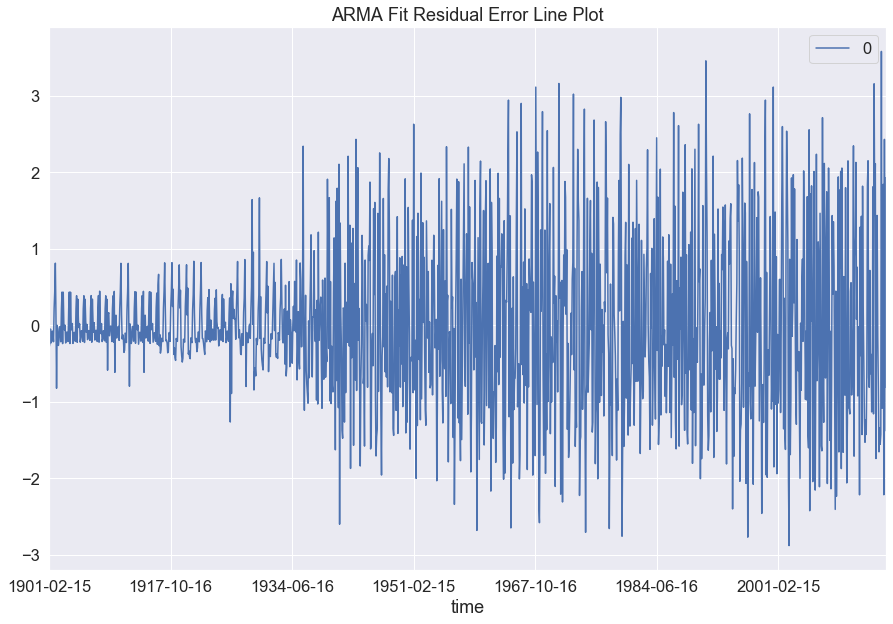

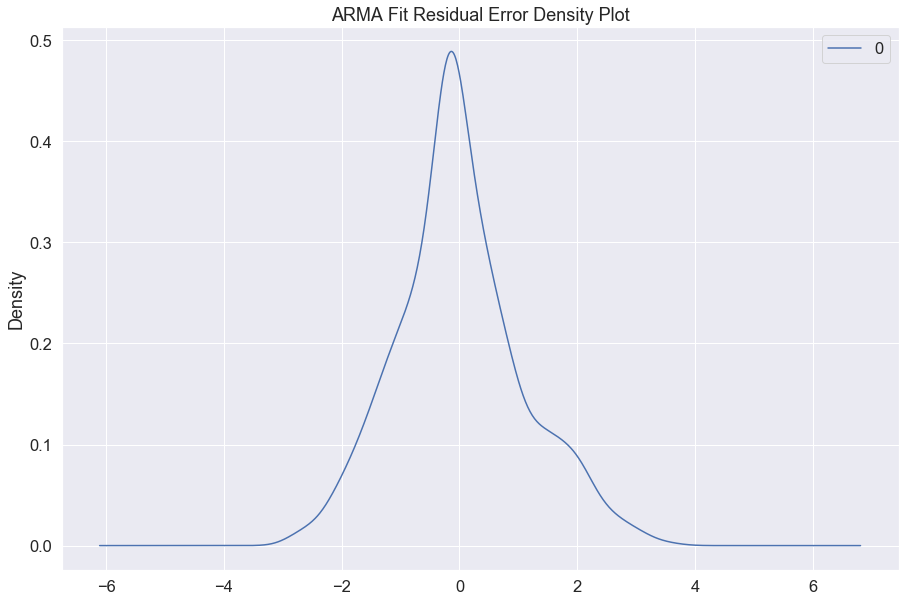

                 0
count  1379.000000
mean     -0.000342
std       1.072930
min      -2.880340
25%      -0.657760
50%      -0.096871
75%       0.571221
max       3.580323


In [169]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_Boulder, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot(figsize=(15, 10),title="ARMA Fit Residual Error Line Plot")
pyplot.show()
residuals.plot(kind='kde',figsize=(15, 10),title="ARMA Fit Residual Error Density Plot")
pyplot.show()
print(residuals.describe())

In [ ]:
#ARIMA - Rolling forecast
X=df_Boulder.values
dates=df_Boulder.index.values
size = int(len(X) * 0.66)
train,test,train_indices,test_indices= X[0:size], X[size:len(X)],dates[0:size],dates[size:len(dates)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

Test MSE: 1.764


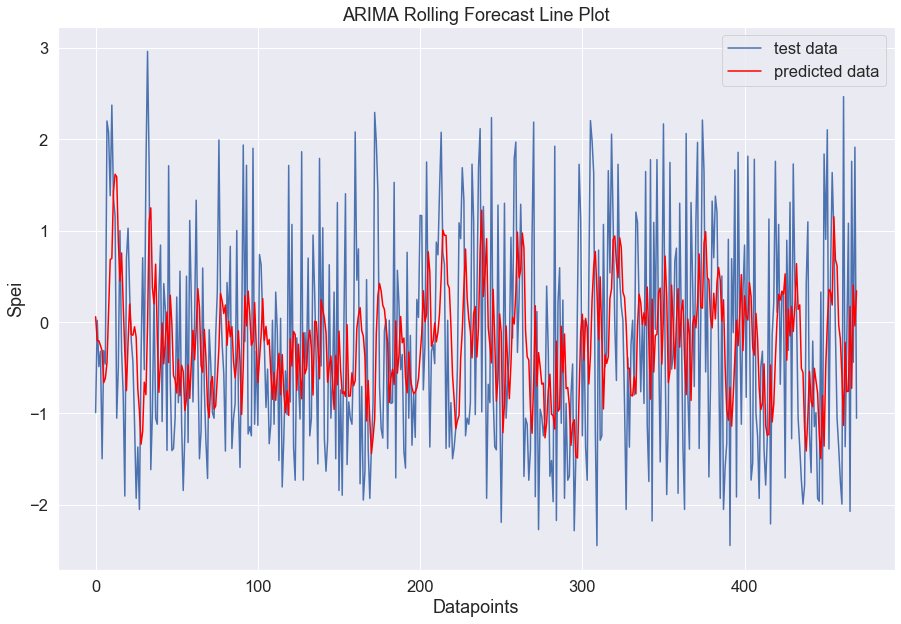

In [213]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(15,10))
pyplot.plot(test,label="test data")
pyplot.plot(predictions,label="predicted data", color='red')
pyplot.xlabel("Datapoints")
pyplot.ylabel("Spei")
pyplot.title("ARIMA Rolling Forecast Line Plot")
pyplot.legend()
pyplot.show()

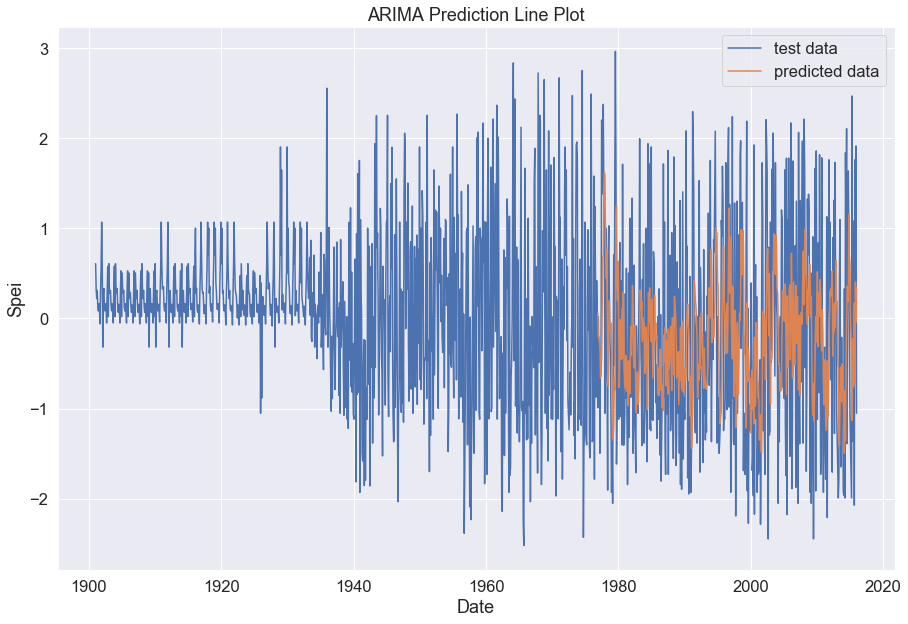

In [231]:
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
pyplot.figure(figsize=(15,10))
date_objects = [datetime.strptime(date, '%Y-%m-%d').date() for date in dates]
pyplot.plot(date_objects,X,label="test data")
date_objects = [datetime.strptime(date, '%Y-%m-%d').date() for date in test_indices]
pyplot.plot(date_objects,predictions,label="predicted data")
pyplot.xlabel("Date")
pyplot.ylabel("Spei")
pyplot.title("ARIMA Prediction Line Plot")
pyplot.legend()
pyplot.show()